In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
i_f_d = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv')
i_f_d

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
995,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
996,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
997,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [3]:
for column_name in i_f_d.columns:
    print(column_name)

328
48
521585
17-10-2014
OH
250/500
1000
1406.91
0
466132
MALE
MD
craft-repair
sleeping
husband
53300
0.1
25-01-2015
Single Vehicle Collision
Side Collision
Major Damage
Police
SC
Columbus
9935 4th Drive
5
1
YES
1.1
2
YES.1
71610
6510
13020
52080
Saab
92x
2004
Y


In [4]:
new_column_names = {
    '328': 'months',
    '48': 'age',
    '521585': 'policy_number',
    '17-10-2014': 'policy_date',
    'OH': 'policy_state',
    '250/500': 'csl',
    '1000': 'deductible',
    '1406.91': 'annual_premium',
    '0': 'umbrella_limit',
    '466132': 'insured_zip',
    'MALE': 'sex',
    'MD': 'education_level',
    'craft-repair': 'occupation',
    'sleeping': 'hobbies',
    'husband': 'relaltionship',
    '53300': 'gains',
    '0.1': 'loss',
    '25-01-2015': 'date',
    'Single Vehicle Collision': 'incident_type',
    'Side Collision': 'collision_type',
    'Major Damage': 'severity',
    'Police': 'authorities_contacted',
    'SC': 'state',
    'Columbus': 'city',
    '9935 4th Drive': 'location',
    '5': 'hour_of_day',
    '1': 'no_of_vehicles_involved',
    'YES': 'property_damage',
    '1.1': 'bodily_injuries',
    '2': 'witnesses',
    'YES.1': 'police_report_available',
    '71610': 'total_claim_amount',
    '6510': 'injury_claim',
    '13020': 'property_claim',
    '52080': 'vehicle_claim',
    'Saab': 'auto_make',
    '92x': 'auto_model',
    '2004': 'auto_year',
    'Y': 'fraud_reported'
}

i_f_d.rename(columns=new_column_names, inplace=True)

print(i_f_d)


     months  age  policy_number policy_date policy_state       csl  \
0       228   42         342868  27-06-2006           IN   250/500   
1       134   29         687698  06-09-2000           OH   100/300   
2       256   41         227811  25-05-1990           IL   250/500   
3       228   44         367455  06-06-2014           IL  500/1000   
4       256   39         104594  12-10-2006           OH   250/500   
..      ...  ...            ...         ...          ...       ...   
994       3   38         941851  16-07-1991           OH  500/1000   
995     285   41         186934  05-01-2014           IL   100/300   
996     130   34         918516  17-02-2003           OH   250/500   
997     458   62         533940  18-11-2011           IL  500/1000   
998     456   60         556080  11-11-1996           OH   250/500   

     deductible  annual_premium  umbrella_limit  insured_zip  ... witnesses  \
0          2000         1197.22         5000000       468176  ...         0   
1

In [5]:
i_f_d.head(3)

,months,age,policy_number,policy_date,policy_state,csl,deductible,annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y


In [6]:
i_f_d.replace('?',np.nan,inplace= True)

In [7]:
i_f_d.describe()

,months,age,policy_number,deductible,annual_premium,umbrella_limit,insured_zip,gains,loss,hour_of_day,no_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,203.829830,38.938939,546263.326326,1136.136136,1256.255495,1.102102e+06,501249.605606,25097.897898,-26820.520521,11.650651,1.839840,0.991992,1.486486,52743.073073,7434.344344,7393.943944,37914.784785,2005.104104
std,115.103809,9.140370,257190.576942,612.155989,244.243187,2.298293e+06,71728.919924,27871.869471,28105.366259,6.951671,1.019044,0.820538,1.111773,26408.011569,4883.309038,4823.859773,18890.397013,6.018773
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.500000,32.000000,335913.500000,500.000000,1089.185000,0.000000e+00,448373.000000,0.000000,-51500.000000,6.000000,1.000000,0.000000,1.000000,41775.000000,4290.000000,4440.000000,30275.000000,2000.000000
50%,199.000000,38.000000,533940.000000,1000.000000,1257.040000,0.000000e+00,466498.000000,0.000000,-24100.000000,12.000000,1.000000,1.000000,1.000000,57970.000000,6780.000000,6750.000000,42080.000000,2005.000000
75%,276.000000,44.000000,759459.500000,2000.000000,1415.710000,0.000000e+00,603254.000000,51000.000000,0.000000,17.000000,3.000000,2.000000,2.000000,70550.000000,11310.000000,10870.000000,50775.000000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


In [8]:
i_f_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   months                   999 non-null    int64  
 1   age                      999 non-null    int64  
 2   policy_number            999 non-null    int64  
 3   policy_date              999 non-null    object 
 4   policy_state             999 non-null    object 
 5   csl                      999 non-null    object 
 6   deductible               999 non-null    int64  
 7   annual_premium           999 non-null    float64
 8   umbrella_limit           999 non-null    int64  
 9   insured_zip              999 non-null    int64  
 10  sex                      999 non-null    object 
 11  education_level          999 non-null    object 
 12  occupation               999 non-null    object 
 13  hobbies                  999 non-null    object 
 14  relaltionship            9

In [9]:
i_f_d.isnull().sum()

months                       0
age                          0
policy_number                0
policy_date                  0
policy_state                 0
csl                          0
deductible                   0
annual_premium               0
umbrella_limit               0
insured_zip                  0
sex                          0
education_level              0
occupation                   0
hobbies                      0
relaltionship                0
gains                        0
loss                         0
date                         0
incident_type                0
collision_type             178
severity                     0
authorities_contacted       91
state                        0
city                         0
location                     0
hour_of_day                  0
no_of_vehicles_involved      0
property_damage            360
bodily_injuries              0
witnesses                    0
police_report_available    343
total_claim_amount           0
injury_c

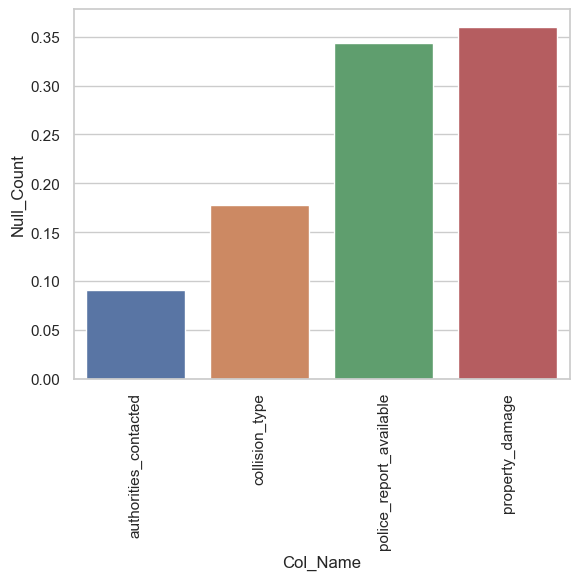

In [10]:
missing = i_f_d.isnull().sum() / len(i_f_d)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing = missing.to_frame()
missing.columns = ['Null_Count']
missing.index.names = ['Col_Name']
missing = missing.reset_index()
sns.set(style='whitegrid', color_codes=True)
sns.barplot(x='Col_Name', y='Null_Count', data=missing)
plt.xticks(rotation=90)
plt.show()


In [11]:
i_f_d['collision_type'] = i_f_d['collision_type'].fillna(i_f_d['collision_type'].mode()[0])
i_f_d['police_report_available'] = i_f_d['police_report_available'].fillna(i_f_d['police_report_available'].mode()[0])
i_f_d['property_damage'] = i_f_d['property_damage'].fillna(i_f_d['property_damage'].mode()[0])

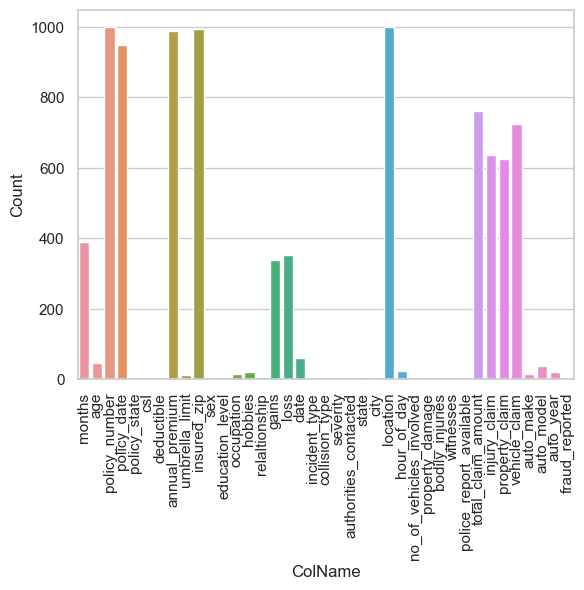

In [12]:
unique = i_f_d.nunique().to_frame()
unique.columns = ['Count']
unique.index.names = ['ColName']
unique = unique.reset_index()
sns.set(style = 'whitegrid',color_codes = True)
sns.barplot(x='ColName',y='Count',data=unique)
plt.xticks(rotation=90)
plt.show()

In [13]:
unique.sort_values(by='Count',ascending= False)

,ColName,Count
2,policy_number,999
24,location,999
9,insured_zip,994
7,annual_premium,990
3,policy_date,950
31,total_claim_amount,763
34,vehicle_claim,726
32,injury_claim,638
33,property_claim,625
0,months,391


In [14]:
to_drop = ['policy_number','policy_date','policy_state','insured_zip','location','date',
           'state','city','hobbies','auto_make','auto_model','auto_year']

i_f_d.drop(to_drop,inplace= True,axis= 1)

In [15]:
i_f_d.head()

ColName,months,age,csl,deductible,annual_premium,umbrella_limit,sex,education_level,occupation,relaltionship,...,no_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
1,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
2,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
3,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N
4,256,39,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,unmarried,...,3,NO,0,2,NO,64100,6410,6410,51280,Y


In [16]:
numerator, denominator = map(float, '250/500'.split('/'))
result = numerator / denominator
print(result)


0.5


In [17]:
X = i_f_d.drop('fraud_reported', axis=1)
y = i_f_d['fraud_reported']

In [18]:
categorical_cols = X.select_dtypes(include=['object'])
categorical_cols = pd.get_dummies(categorical_cols, drop_first=True) 
categorical_cols = categorical_cols.astype(int)  
categorical_cols.head()  

,csl_250/500,csl_500/1000,sex_MALE,education_level_College,education_level_High School,education_level_JD,education_level_MD,education_level_Masters,education_level_PhD,occupation_armed-forces,...,collision_type_Rear Collision,collision_type_Side Collision,severity_Minor Damage,severity_Total Loss,severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [19]:
numerical_col = X.select_dtypes(include = ['int64'])
X = pd.concat([numerical_col,categorical_cols], axis=1)

In [20]:
X.head()

,months,age,deductible,umbrella_limit,gains,loss,hour_of_day,no_of_vehicles_involved,bodily_injuries,witnesses,...,collision_type_Rear Collision,collision_type_Side Collision,severity_Minor Damage,severity_Total Loss,severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,228,42,2000,5000000,0,0,8,1,0,0,...,1,0,1,0,0,0,0,1,0,0
1,134,29,2000,5000000,35100,0,7,3,2,3,...,1,0,1,0,0,0,0,1,0,0
2,256,41,2000,6000000,48900,-62400,5,1,1,2,...,0,0,0,0,0,0,0,1,0,0
3,228,44,1000,6000000,66000,-46000,20,1,0,1,...,1,0,1,0,0,0,0,0,0,0
4,256,39,1000,0,0,0,19,3,0,2,...,1,0,0,0,0,1,0,0,0,0


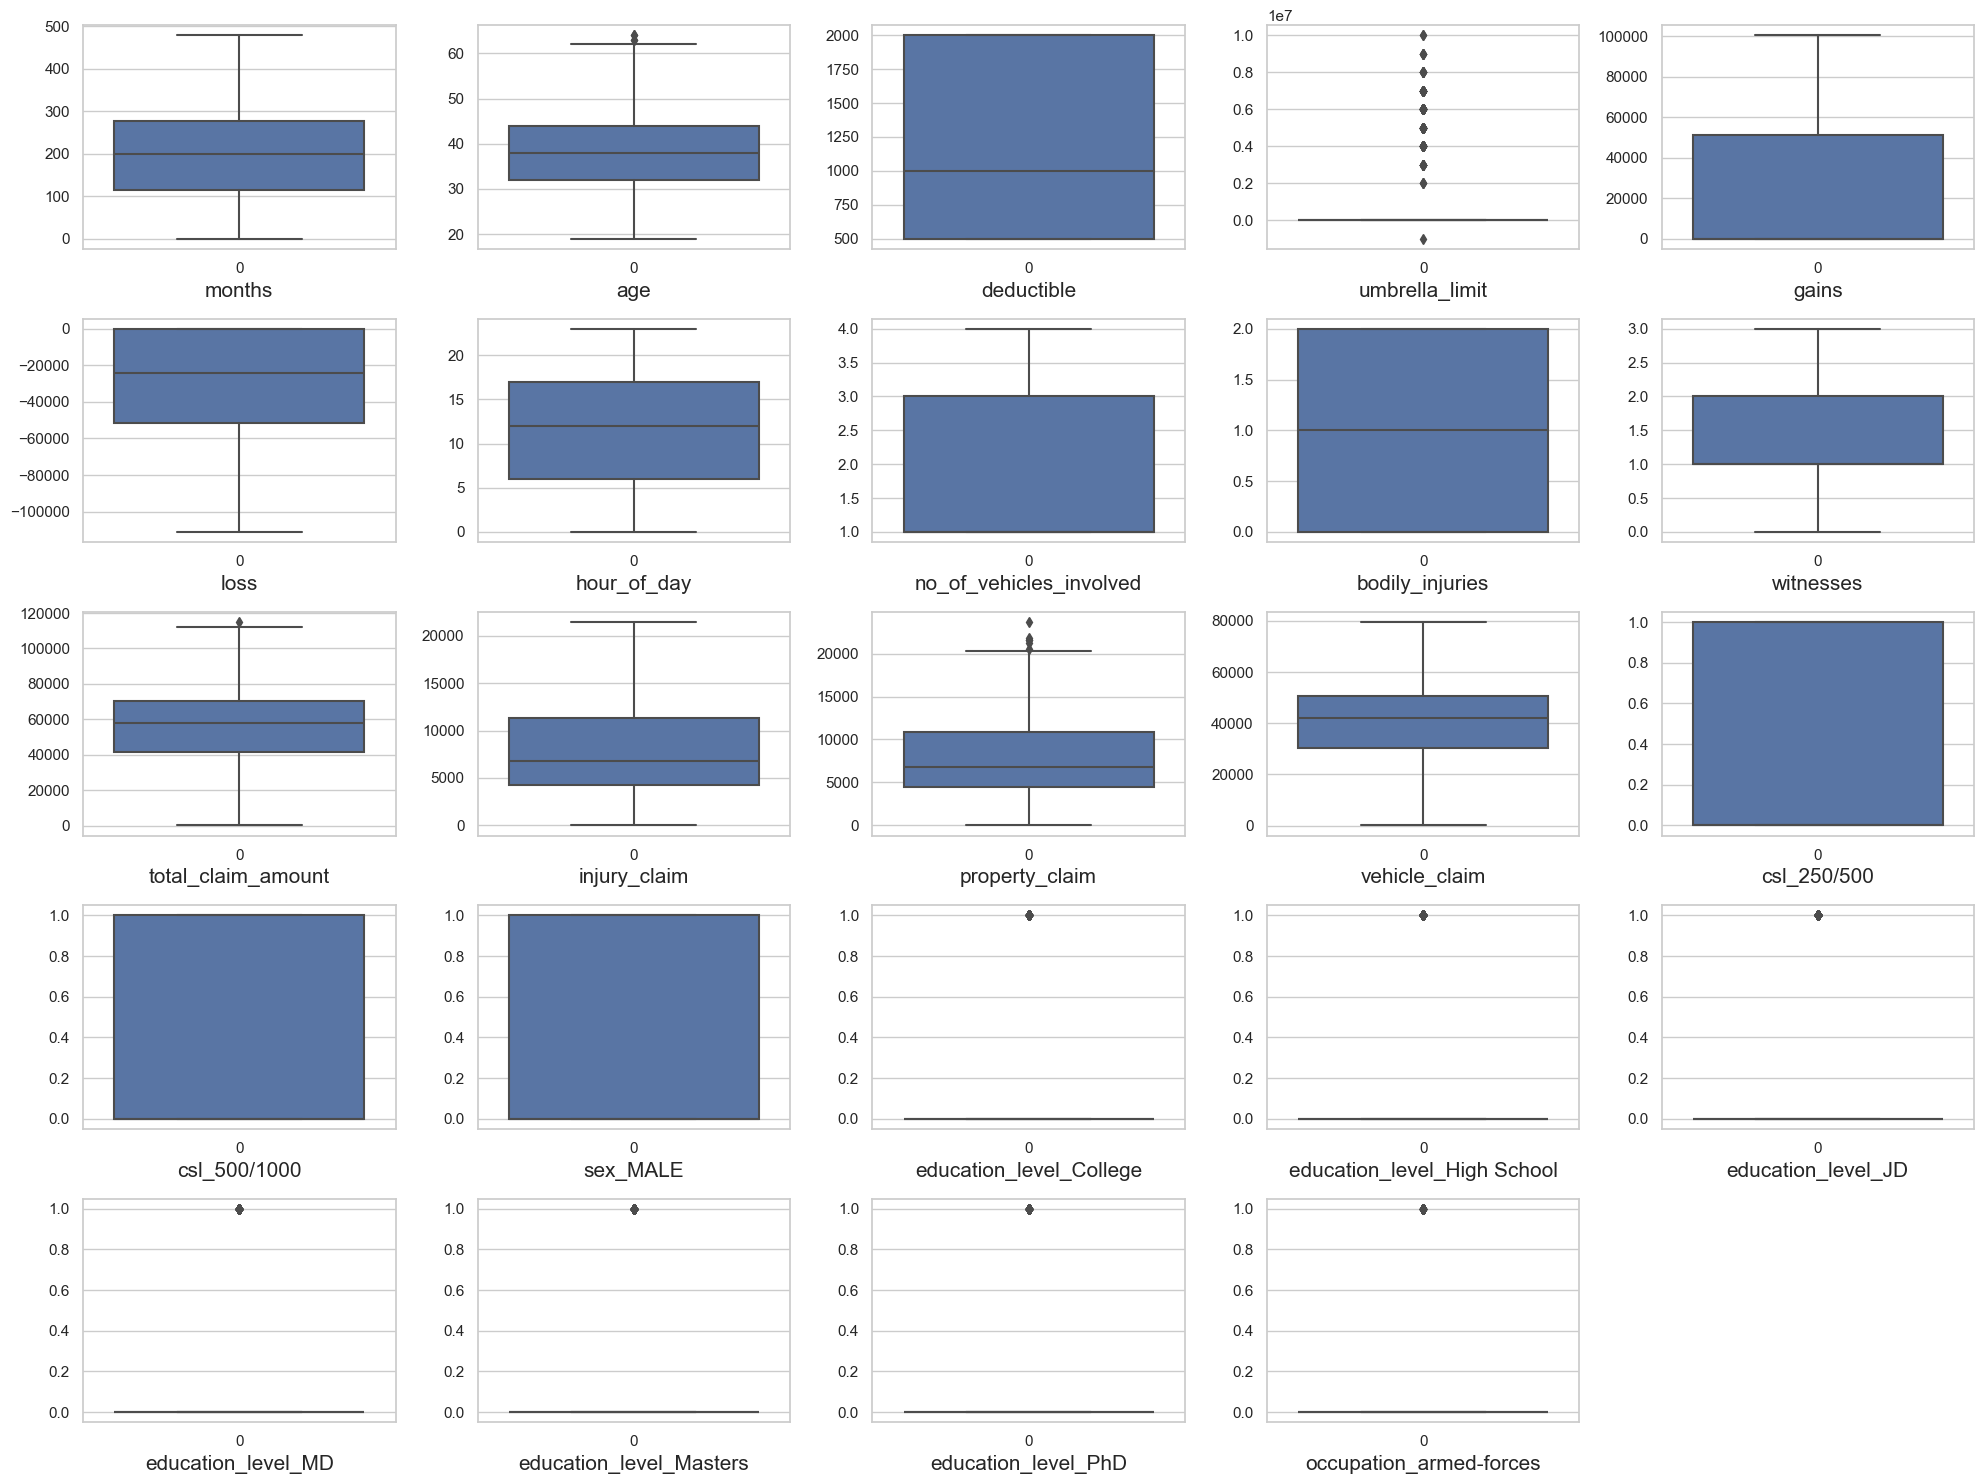

In [21]:
plt.figure(figsize = (20,15))
plotnumber = 1
 
for col in X.columns:
     if plotnumber <= 24:
         ax=plt.subplot(5,5, plotnumber)
         sns.boxplot(X[col])
         plt.xlabel(col, fontsize = 15)
     plotnumber += 1
plt.tight_layout()
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_test, y_train = train_test_split(X,y, test_size= 0.25)

In [30]:
X_train.head()

,months,age,deductible,umbrella_limit,gains,loss,hour_of_day,no_of_vehicles_involved,bodily_injuries,witnesses,...,collision_type_Rear Collision,collision_type_Side Collision,severity_Minor Damage,severity_Total Loss,severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
217,328,46,500,0,24800,0,0,1,2,3,...,1,0,0,1,0,0,1,0,0,0
54,22,26,1000,0,71500,0,3,1,1,2,...,1,0,1,0,0,1,0,0,1,0
53,195,39,1000,0,47600,-39600,5,1,0,1,...,1,0,1,0,0,0,0,1,0,1
157,45,38,1000,0,29000,0,17,3,2,0,...,0,0,0,1,0,0,0,0,0,0
921,55,35,500,8000000,0,0,9,1,0,3,...,1,0,1,0,0,0,0,1,0,0


In [31]:
numerical_data= X_train[['months','deductible','umbrella_limit','gains','loss','hour_of_day','no_of_vehicles_involved','bodily_injuries','witnesses','injury_claim','property_claim','vehicle_claim']]

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [33]:
scaled_num_df=pd.DataFrame(data = scaled_data, columns = numerical_data.columns, index = X_train.index)
scaled_num_df.head()

,months,deductible,umbrella_limit,gains,loss,hour_of_day,no_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
217,1.060858,-1.03111,-0.492407,-0.002788,0.952325,-1.658571,-0.803652,1.223173,1.359657,1.111919,-0.191704,0.707868
54,-1.588963,-0.22157,-0.492407,1.681447,0.952325,-1.226477,-0.803652,0.006498,0.465554,1.722895,0.113833,0.921800
53,-0.090862,-0.22157,-0.492407,0.819494,-0.444287,-0.938415,-0.803652,-1.210178,-0.428549,-1.393082,-1.395518,-1.865567
157,-1.389794,-0.22157,-0.492407,0.148685,0.952325,0.789961,1.169907,1.223173,-1.322652,1.164870,1.162843,0.762002
921,-1.303198,-1.03111,2.938411,-0.897200,0.952325,-0.362290,-0.803652,-1.210178,1.359657,-1.376789,-1.379223,-1.850992


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)
y_pred = svc_model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_model_train_acc = accuracy_score(y_train,svc_model.predict(X_train))
svc_model_train_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy:",svc_model_train_acc)
print("Testing Accuracy:",svc_model_train_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy: 0.765
Testing Accuracy: 0.765
[[153   0]
 [ 47   0]]
              precision    recall  f1-score   support

           N       0.77      1.00      0.87       153
           Y       0.00      0.00      0.00        47

    accuracy                           0.77       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.59      0.77      0.66       200



In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors = 30)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn_model_train_acc = accuracy_score(y_train,knn_model.predict(X_train))
knn_model_train_acc = accuracy_score(y_test,y_pred)

print("Training Accuracy:",svc_model_train_acc)
print("Testing Accuracy:",svc_model_train_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy: 0.765
Testing Accuracy: 0.765
[[153   0]
 [ 47   0]]
              precision    recall  f1-score   support

           N       0.77      1.00      0.87       153
           Y       0.00      0.00      0.00        47

    accuracy                           0.77       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.59      0.77      0.66       200



In [41]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
decision_tree_model_train_acc = accuracy_score(y_train,decision_tree_model.predict(X_train))
decision_tree_model_train_acc = accuracy_score(y_test,y_pred)

print("Training Accuracy:",decision_tree_model_train_acc)
print("Testing Accuracy:",decision_tree_model_train_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy: 0.695
Testing Accuracy: 0.695
[[122  31]
 [ 30  17]]
              precision    recall  f1-score   support

           N       0.80      0.80      0.80       153
           Y       0.35      0.36      0.36        47

    accuracy                           0.69       200
   macro avg       0.58      0.58      0.58       200
weighted avg       0.70      0.69      0.70       200

